# Train model

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df1 = pd.read_excel('Datasets/label.xlsx')
df2 = pd.read_csv('Datasets/Mountain_climb_test.csv')

df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Separate features (X) and labels (y)
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Neural Network (MLPClassifier)
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, alpha=0.001, random_state=42)
model.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=50,
              random_state=42)

In [102]:
df['Label'].value_counts()

Label
0    2398
1     688
Name: count, dtype: int64

# Test model accuracy

Accuracy: 98.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       460
           1       0.97      0.97      0.97       158

    accuracy                           0.98       618
   macro avg       0.98      0.98      0.98       618
weighted avg       0.98      0.98      0.98       618


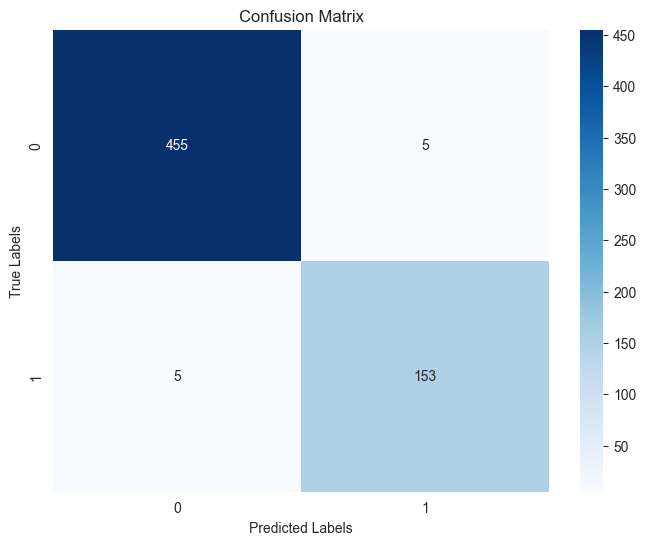

In [103]:
from matplotlib import pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Test with random data set

Accuracy: 0.03
Confusion Matrix:


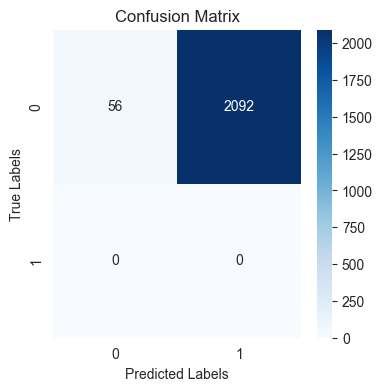

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05      2148
           1       0.00      0.00      0.00         0

    accuracy                           0.03      2148
   macro avg       0.50      0.01      0.03      2148
weighted avg       1.00      0.03      0.05      2148


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns

model_path = 'Model/model.pkl'
model = pickle.load(open(model_path, 'rb'))

file_path = 'Datasets/Mountain_climb_test.csv'
df = pd.read_csv(file_path)

X = df.drop('Label', axis=1)
y = df['Label']

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

# Save Model

In [105]:
import pickle

# Save the trained model to a file
model_filename = 'Model/model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved as {model_filename}")


Model saved as Model/model.pkl
